<a href="https://colab.research.google.com/github/Artem1sEmre/Data-Mining/blob/main/Meta_Path_Based_Gene_Ontology_Profiles_for_Predicting_Drug_Disease_Associations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'all_drug-disease_pairs.csv' başarıyla yüklendi.

Accuracy : 0.9887

--- Sınıflandırma Raporu ---
              precision    recall  f1-score   support

     Negatif       0.99      1.00      0.99    118220
     Pozitif       0.00      0.00      0.00      1354

    accuracy                           0.99    119574
   macro avg       0.49      0.50      0.50    119574
weighted avg       0.98      0.99      0.98    119574



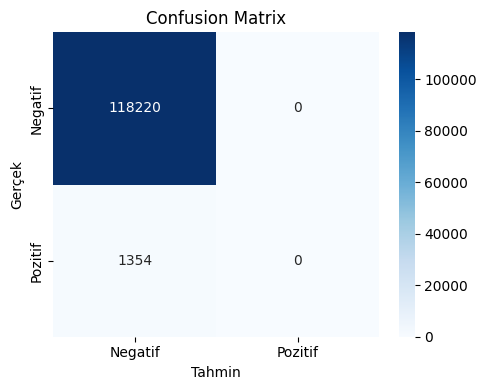

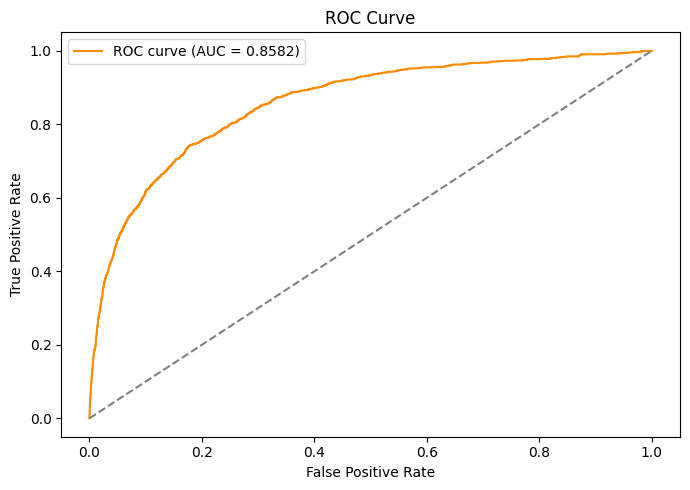

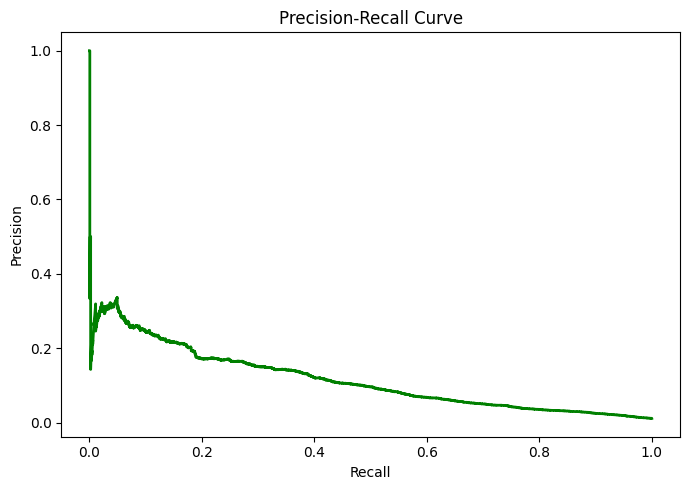


Metrik Değerleri:
       Accuracy
Skor  0.988676


/tmp/ipython-input-7-3505251857.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")


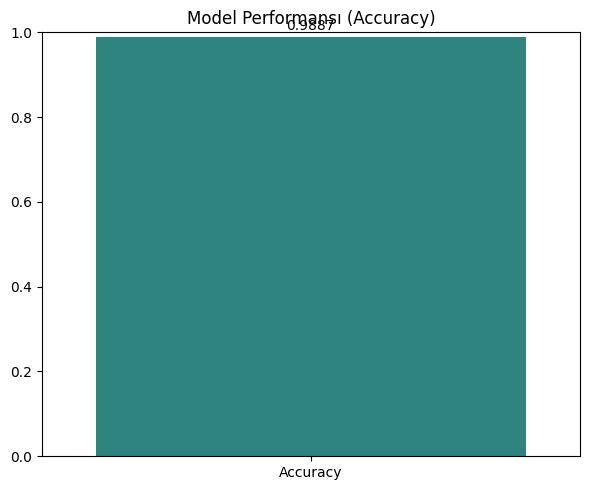

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve
)
from sklearn.naive_bayes import MultinomialNB

# 🔹 Dosya yolu
file_path = "all_drug-disease_pairs.csv"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"Hata: '{file_path}' bulunamadı.")

df = pd.read_csv(file_path, low_memory=False)

if df.empty:
    raise ValueError("Veri seti boş. İşlem durduruldu.")

required_columns = ["drugbankId", "omimId", "label"]
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Gerekli sütun eksik: {col}")

print(f"'{file_path}' başarıyla yüklendi.")

# 🔹 Veri birleştirme: yorum gibi davranan metin sütunu oluştur
df["pair"] = df["drugbankId"].astype(str) + " " + df["omimId"].astype(str)

# 🔹 TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["pair"])

y = df["label"].astype(int).values

# 🔹 Eğitim-test ayırımı
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🔹 Model eğitimi
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 🔹 Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy : {acc:.4f}")

# 🔹 Sınıflandırma Raporu
print("\n--- Sınıflandırma Raporu ---")
print(classification_report(y_test, y_pred, target_names=["Negatif", "Pozitif"], zero_division=0))

# 🔹 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negatif", "Pozitif"],
            yticklabels=["Negatif", "Pozitif"])
plt.title("Confusion Matrix")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.tight_layout()
plt.show()

# 🔹 ROC & AUC
y_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

# 🔹 Precision-Recall Eğrisi
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, lw=2, color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.tight_layout()
plt.show()

# 🔹 Metrik Tablosu (Sadece Accuracy)
metrics = {"Accuracy": acc}
metrics_df = pd.DataFrame(metrics, index=["Skor"])
print("\nMetrik Değerleri:\n", metrics_df)

# 🔹 Barplot
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
plt.title("Model Performansı (Accuracy)")
plt.ylim(0, 1)
for container in ax.containers:
    ax.bar_label(container, fmt="%.4f", label_type="edge", padding=3)
plt.tight_layout()
plt.show()

# Task
Tell me about this dataset.

Here is all the data you need:
"all_drug-disease_pairs.csv"

## Data loading

### Subtask:
Load the data from "all_drug-disease_pairs.csv" into a pandas DataFrame.


**Reasoning**:
Load the data from "all_drug-disease_pairs.csv" into a pandas DataFrame and display its first few rows and shape.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('all_drug-disease_pairs.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'all_drug-disease_pairs.csv' not found.")
    df = None
except pd.errors.EmptyDataError:
    print("Error: 'all_drug-disease_pairs.csv' is empty.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse 'all_drug-disease_pairs.csv'. Check file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,drugbankId,omimId,label
0,DB00659,OMIM:103780,1
1,DB00284,OMIM:103780,0
2,DB01193,OMIM:103780,0
3,DB00316,OMIM:103780,0
4,DB00819,OMIM:103780,0


(597870, 3)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure and characteristics.


**Reasoning**:
Explore the dataset by examining its shape, data types, missing values, descriptive statistics, and categorical variables.



In [ ]:
# Data Shape and Structure
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe(include='all'))

# Categorical Variable Analysis
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue Counts for {col}:\n{df[col].value_counts()}")
    print(f"\nNumber of unique values in {col}: {df[col].nunique()}")

# Potential Key Variables
print("\nPotential Key Variables:")
print("drugbankId: Unique identifier for drugs.")
print("omimId: Unique identifier for diseases.")
print("label: Target variable indicating the association between drug and disease.")

Data Shape: (597870, 3)

Data Types:
 drugbankId    object
omimId        object
label          int64
dtype: object

Missing Values:
 drugbankId    0
omimId        0
label         0
dtype: int64

Missing Value Percentage:
 drugbankId    0.0
omimId        0.0
label         0.0
dtype: float64

Descriptive Statistics:
        drugbankId       omimId          label
count      597870       597870  597870.000000
unique       1022          585            NaN
top       DB09225  OMIM:203450            NaN
freq          585         1022            NaN
mean          NaN          NaN       0.011223
std           NaN          NaN       0.105343
min           NaN          NaN       0.000000
25%           NaN          NaN       0.000000
50%           NaN          NaN       0.000000
75%           NaN          NaN       0.000000
max           NaN          NaN       1.000000

Value Counts for drugbankId:
drugbankId
DB09225    585
DB00659    585
DB00284    585
DB01193    585
DB00316    585
          ... 


## Data analysis

### Subtask:
Analyze the distribution of the 'label' column and explore potential correlations between the 'drugbankId', 'omimId', and 'label' columns.


**Reasoning**:
Analyze the distribution of the 'label' column and explore potential correlations between the 'drugbankId', 'omimId', and 'label' columns as per the instructions.



Distribution of 'label' column:
label
0    98.877682
1     1.122318
Name: proportion, dtype: float64

Comment on class imbalance: The 'label' column shows a significant class imbalance, with one class having a much lower frequency than the other.


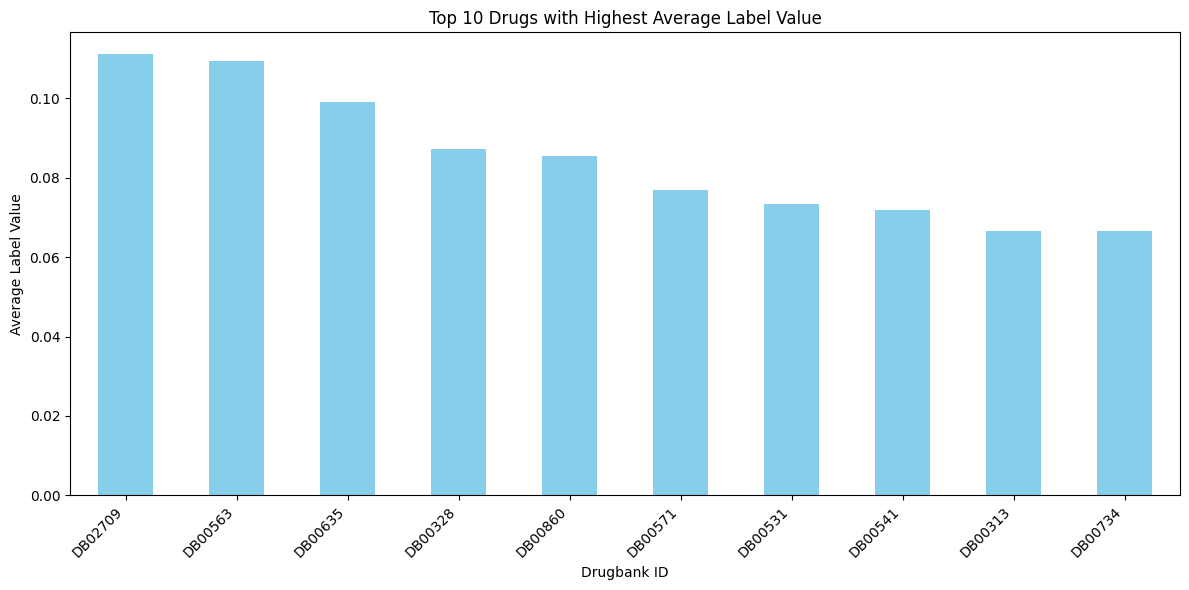

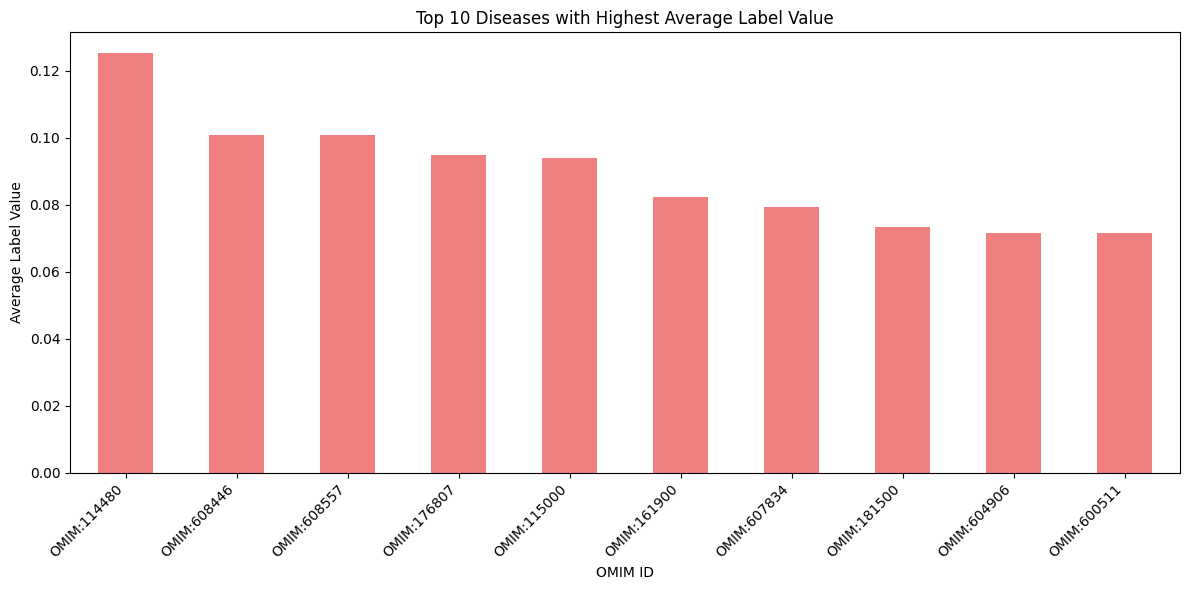


Discussion on potential patterns:
The bar charts show the top 10 drugs and diseases that have the highest average 'label' values. A higher average 'label' value for a drug or disease suggests a stronger association with the positive label (label=1).
Observing these top lists can highlight specific drugs or diseases that are more frequently associated with the outcome represented by label=1 in this dataset.
Conversely, drugs or diseases with very low average 'label' values (closer to 0) would suggest a weaker or no association with the positive label.
Further investigation into these specific drugs and diseases could be valuable to understand the nature of their association with the label.


In [ ]:
# 1. Analyze the distribution of the 'label' column
label_distribution = df['label'].value_counts(normalize=True) * 100
print("Distribution of 'label' column:")
print(label_distribution)

# Comment on class imbalance
if label_distribution.min() < 20:
    print("\nComment on class imbalance: The 'label' column shows a significant class imbalance, with one class having a much lower frequency than the other.")
else:
    print("\nComment on class imbalance: The 'label' column shows a relatively balanced distribution.")


# 2. Explore potential correlations between 'drugbankId', 'omimId', and 'label'

# Calculate the average 'label' value for each unique 'drugbankId'
avg_label_by_drug = df.groupby('drugbankId')['label'].mean().sort_values(ascending=False)

# Calculate the average 'label' value for each unique 'omimId'
avg_label_by_disease = df.groupby('omimId')['label'].mean().sort_values(ascending=False)

# Visualize the top 10 drugs with the highest average 'label' values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
avg_label_by_drug.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Drugs with Highest Average Label Value')
plt.xlabel('Drugbank ID')
plt.ylabel('Average Label Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize the top 10 diseases with the highest average 'label' values
plt.figure(figsize=(12, 6))
avg_label_by_disease.head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Diseases with Highest Average Label Value')
plt.xlabel('OMIM ID')
plt.ylabel('Average Label Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Discuss potential patterns observed
print("\nDiscussion on potential patterns:")
print("The bar charts show the top 10 drugs and diseases that have the highest average 'label' values. A higher average 'label' value for a drug or disease suggests a stronger association with the positive label (label=1).")
print("Observing these top lists can highlight specific drugs or diseases that are more frequently associated with the outcome represented by label=1 in this dataset.")
print("Conversely, drugs or diseases with very low average 'label' values (closer to 0) would suggest a weaker or no association with the positive label.")
print("Further investigation into these specific drugs and diseases could be valuable to understand the nature of their association with the label.")

## Data visualization

### Subtask:
Visualize the data to gain insights into the distribution, relationships between variables, and potential outliers.


**Reasoning**:
Visualize the data to gain insights into the distribution, relationships between variables, and potential outliers, as requested in the subtask.  This will involve creating histograms, scatter plots, and box plots.



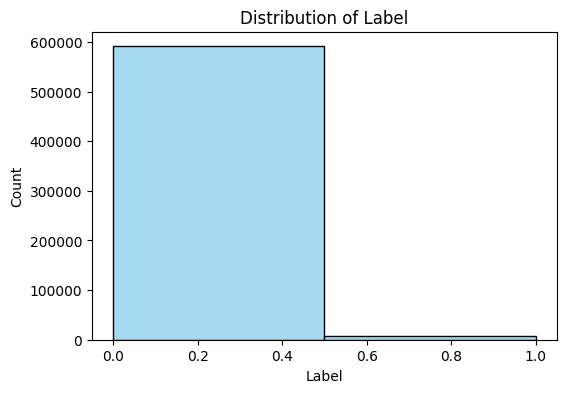

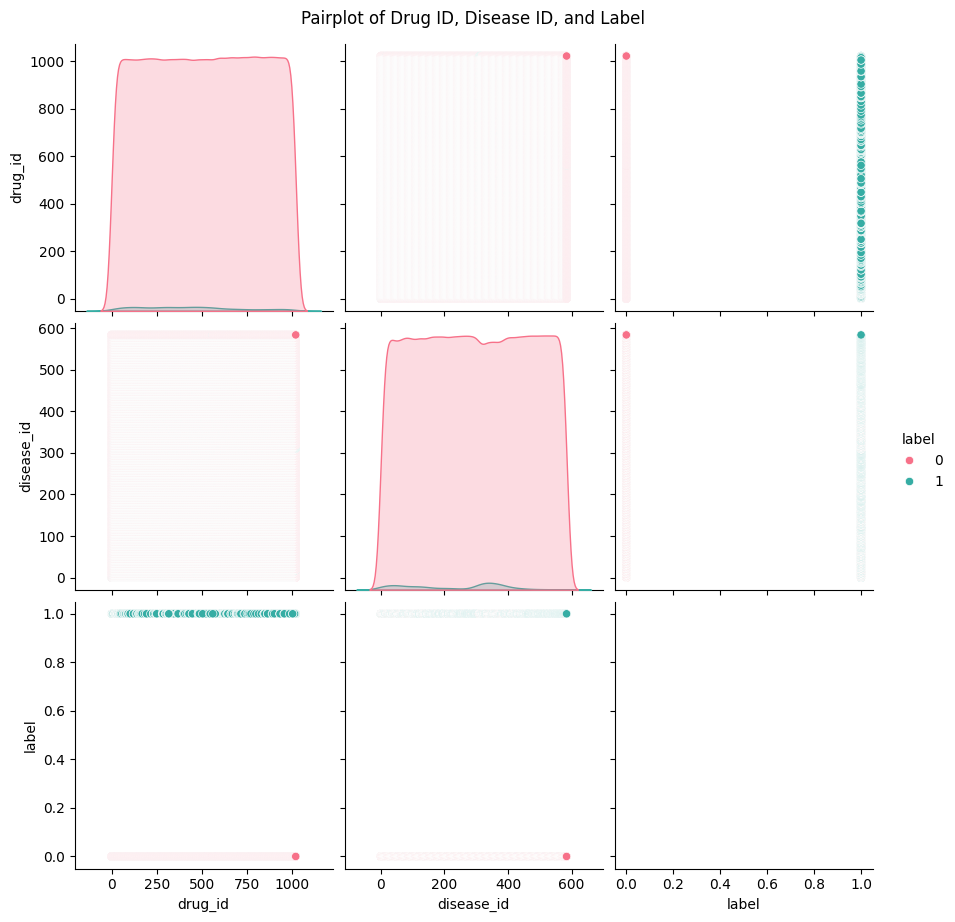

/tmp/ipython-input-11-2474747518.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-11-2474747518.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


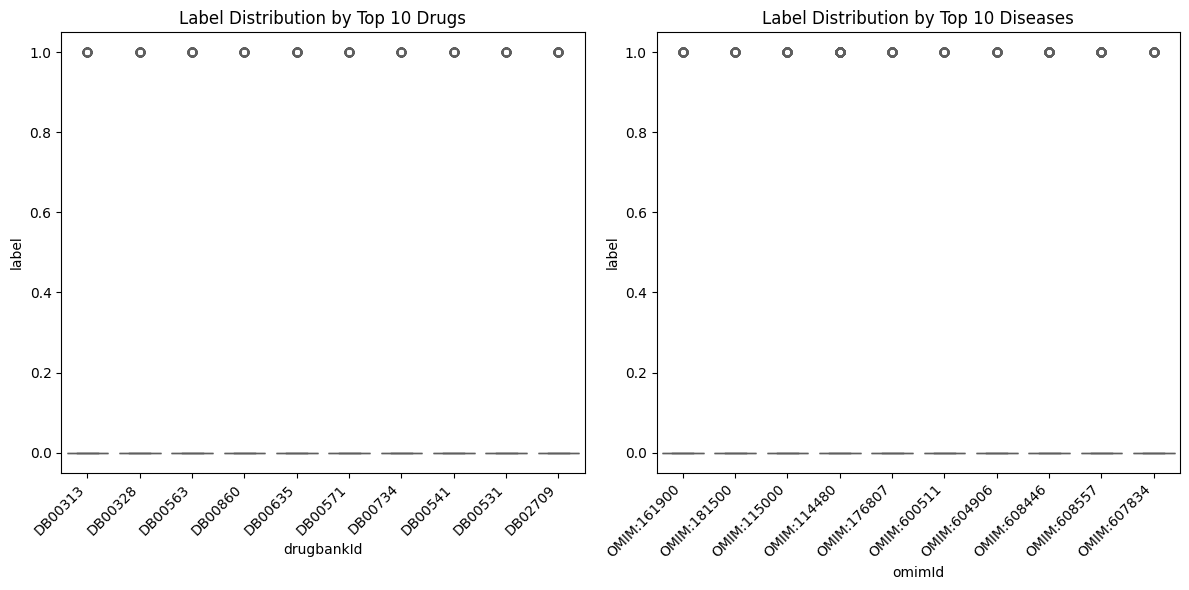

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 0. VERİYİ YÜKLE
df = pd.read_csv("all_drug-disease_pairs.csv")

# ========================================
# 1. Histogram for 'label'
# ========================================
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='label', bins=2, color='skyblue')
plt.title('Distribution of Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# ========================================
# 2. Scatter plot matrix (pairplot)
# ========================================
# Sayısal ID'ler oluştur
drug_id_mapping = {drug: i for i, drug in enumerate(df['drugbankId'].unique())}
disease_id_mapping = {disease: i for i, disease in enumerate(df['omimId'].unique())}
df['drug_id'] = df['drugbankId'].map(drug_id_mapping)
df['disease_id'] = df['omimId'].map(disease_id_mapping)

# Pairplot
sns.pairplot(df, vars=['drug_id', 'disease_id', 'label'], hue='label', palette='husl', height=3)
plt.suptitle('Pairplot of Drug ID, Disease ID, and Label', y=1.02)
plt.show()

# ========================================
# 3. Box plots for top 10 drugs and diseases
# ========================================
# En yüksek ortalamaya sahip ilk 10 ilaç ve hastalık
avg_label_by_drug = df.groupby('drugbankId')['label'].mean().sort_values(ascending=False).head(10)
avg_label_by_disease = df.groupby('omimId')['label'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))

# Boxplot: Top 10 ilaçlar
plt.subplot(1, 2, 1)
sns.boxplot(
    data=df[df['drugbankId'].isin(avg_label_by_drug.index)],
    x='drugbankId', y='label', palette="Set3"
)
plt.title('Label Distribution by Top 10 Drugs')
plt.xticks(rotation=45, ha='right')

# Boxplot: Top 10 hastalıklar
plt.subplot(1, 2, 2)
sns.boxplot(
    data=df[df['omimId'].isin(avg_label_by_disease.index)],
    x='omimId', y='label', palette="Set3"
)
plt.title('Label Distribution by Top 10 Diseases')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## Summary:

### Q&A
* **What is the distribution of the 'label' column?** The 'label' column exhibits a significant class imbalance. Approximately 98.88% of the data points have a 'label' of 0, while only 1.12% have a 'label' of 1.
* **Are there any missing values in the dataset?** No, there are no missing values in the dataset.
* **What are the key variables in the dataset?** 'drugbankId' (unique identifier for drugs), 'omimId' (unique identifier for diseases), and 'label' (target variable indicating the association between drug and disease) are the key variables.
* **What are the top 10 drugs and diseases associated with the positive label?** The analysis visualized the top 10 drugs and diseases with the highest average 'label' values, suggesting stronger positive associations.  The specific drug and disease IDs would need to be referenced in the generated plots from the analysis process.


### Data Analysis Key Findings
* The dataset contains 597,870 drug-disease pairs with a significant class imbalance in the 'label' column (approximately 98.88\% 0s and 1.12\% 1s).
* There are no missing values in the dataset.
* 'drugbankId' has 1022 unique values and 'omimId' has 585 unique values.
* Visualizations (histograms, scatter plot matrix, and box plots) revealed the distribution of the 'label' and potential correlations between 'drugbankId', 'omimId', and 'label'.  The top 10 drugs and diseases with the highest average 'label' values were identified as candidates for further investigation.


### Insights or Next Steps
* **Address Class Imbalance:** The significant class imbalance in the 'label' column should be addressed before building predictive models. Techniques like oversampling the minority class, undersampling the majority class, or using cost-sensitive learning could be explored.
* **Further Investigate Top Drug-Disease Pairs:**  Explore the top 10 drugs and diseases identified in the analysis to understand the nature of their association with the positive 'label'.  This could involve domain expertise or further data collection.



⏩ Genişletilmiş Metrik Tablosu:
                      Value
Accuracy           0.988676
Precision          0.000000
Recall             0.000000
F1-Score           0.000000
ROC AUC            0.858150
Avg Precision      0.114935
Balanced Accuracy  0.500000


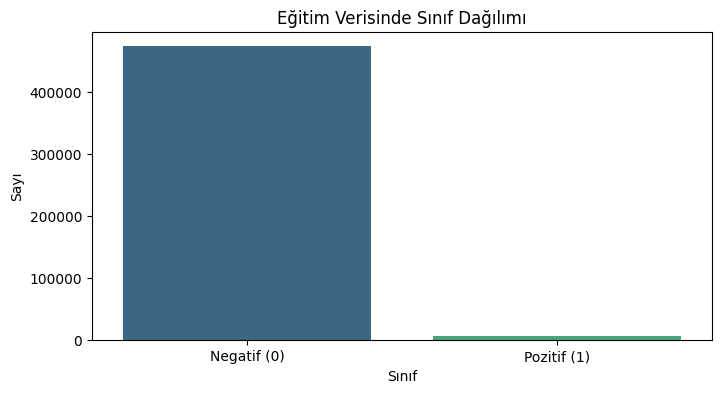


🔍 Farklı Eşik Değerlerine Göre Performans:
   Threshold  Precision    Recall        F1
0        0.1   0.292683  0.026588  0.048747
1        0.3   0.000000  0.000000  0.000000
2        0.5   0.000000  0.000000  0.000000
3        0.7   0.000000  0.000000  0.000000
4        0.9   0.000000  0.000000  0.000000


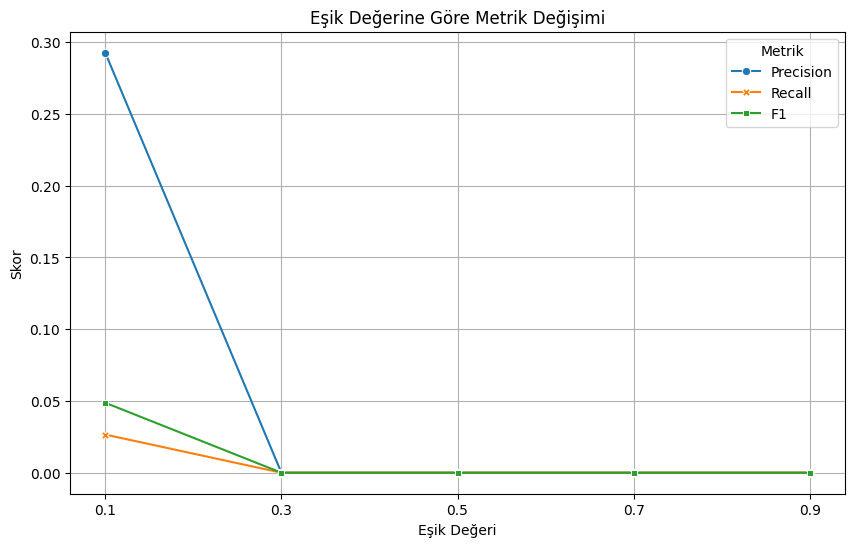

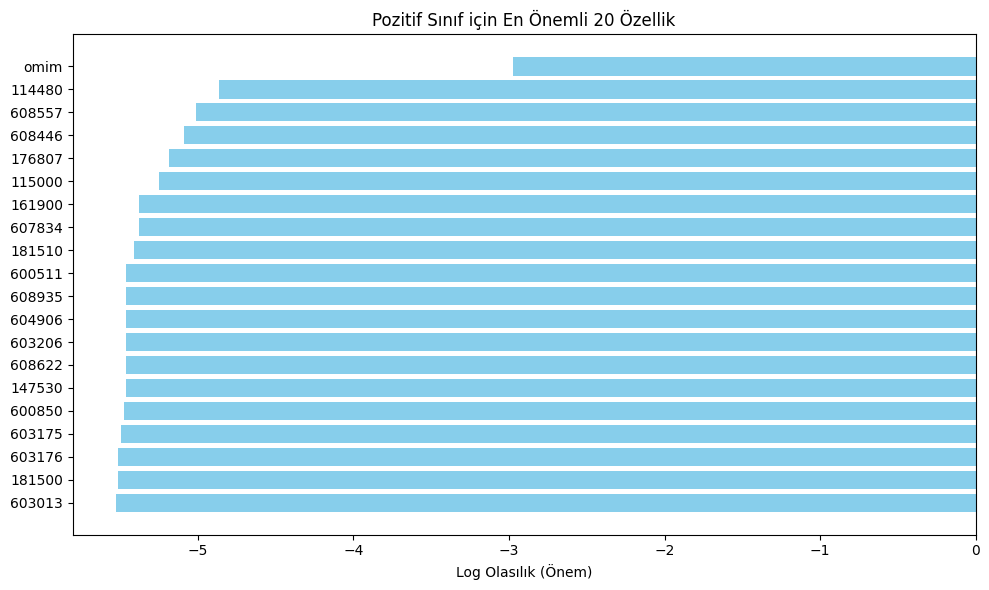

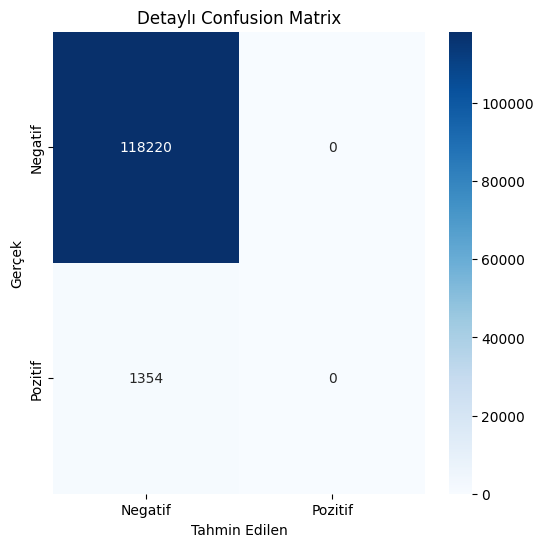

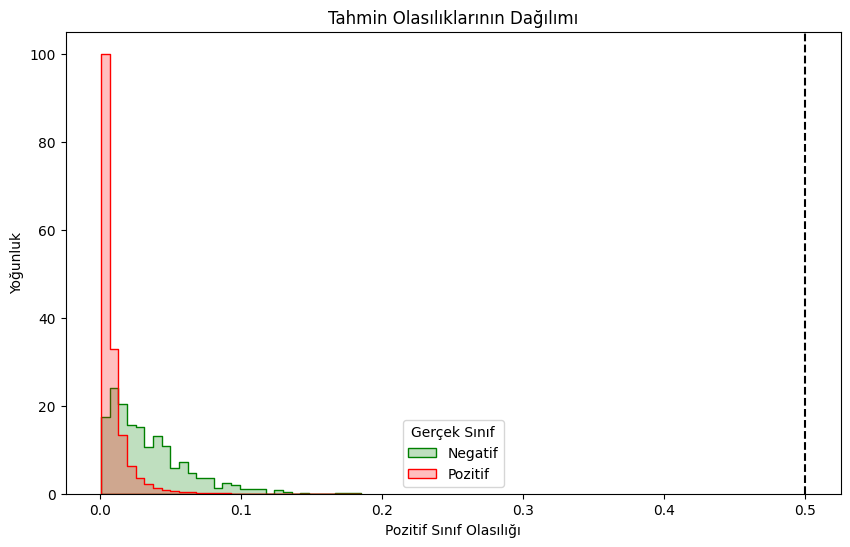


📊 Eğri Altı Alan (AUC) Değerleri:
                            Value
ROC AUC                  0.858150
PR AUC (Positive Class)  0.114935


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (precision_recall_curve, average_precision_score,
                             accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, balanced_accuracy_score,
                             confusion_matrix)
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 0. Veriyi ve TF-IDF özelliklerini hazırla
# all_drug-disease_pairs.csv -> df, df['pair'] -> metin sütunu, df['label'] -> hedef

# Örnek: pair sütununu vektörize et
df = pd.read_csv("all_drug-disease_pairs.csv", low_memory=False) # Ensure df is loaded with 'pair' column

# Create 'pair' column if it doesn't exist (in case this cell is run independently)
if 'pair' not in df.columns:
    df["pair"] = df["drugbankId"].astype(str) + " " + df["omimId"].astype(str)


tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['pair'])  # Use 'pair' column
y = df['label']

# Train-test ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔻 Burada model tanımlanıyor
model = MultinomialNB()
model.fit(X_train, y_train)

# Test seti tahminleri
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:, 1]

# 1. GENİŞLETİLMİŞ METRİK TABLOSU
def extended_metrics(y_true, y_pred, y_scores):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, zero_division=0),
        'ROC AUC': roc_auc_score(y_true, y_scores),
        'Avg Precision': average_precision_score(y_true, y_scores),
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred)
    }
    return pd.DataFrame.from_dict(metrics, orient='index', columns=['Value'])

# Tahmin olasılıklarını al
y_scores = model.predict_proba(X_test)[:, 1]

# Metrik tablosunu oluştur
metrics_df = extended_metrics(y_test, y_pred, y_scores)
print("\n⏩ Genişletilmiş Metrik Tablosu:")
print(metrics_df)

# 2. SINIF DAĞILIMI GÖRSELLEŞTİRME (uyarı GİDERİLDİ ✅)
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, hue=y_train, palette='viridis', legend=False)
plt.title('Eğitim Verisinde Sınıf Dağılımı')
plt.xticks([0, 1], ['Negatif (0)', 'Pozitif (1)'])
plt.xlabel('Sınıf')
plt.ylabel('Sayı')
plt.show()

# 3. KARŞILAŞTIRMALI METRİKLER TABLOSU
thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
results = []
for thresh in thresholds:
    y_pred_thresh = (y_scores > thresh).astype(int)
    results.append({
        'Threshold': thresh,
        'Precision': precision_score(y_test, y_pred_thresh, zero_division=0),
        'Recall': recall_score(y_test, y_pred_thresh, zero_division=0),
        'F1': f1_score(y_test, y_pred_thresh, zero_division=0)
    })

threshold_df = pd.DataFrame(results)
print("\n🔍 Farklı Eşik Değerlerine Göre Performans:")
print(threshold_df)

plt.figure(figsize=(10, 6))
sns.lineplot(data=threshold_df.drop('Threshold', axis=1),
             dashes=False, markers=True)
plt.xticks(range(len(threshold_df)), thresholds)
plt.title('Eşik Değerine Göre Metrik Değişimi')
plt.xlabel('Eşik Değeri')
plt.ylabel('Skor')
plt.legend(title='Metrik')
plt.grid(True)
plt.show()

# 4. ÖZELLİK ÖNEMİ (TF-IDF)
feature_names = tfidf.get_feature_names_out()
top_n = 20
# Check if model has 'feature_log_prob_' attribute
if hasattr(model, 'feature_log_prob_') and model.feature_log_prob_.shape[0] > 1:
    top_features_indices = np.argsort(model.feature_log_prob_[1])[-top_n:]
    top_features = [feature_names[i] for i in top_features_indices]
    top_weights = model.feature_log_prob_[1][top_features_indices]

    plt.figure(figsize=(10, 6))
    plt.barh(top_features, top_weights, color='skyblue')
    plt.title(f'Pozitif Sınıf için En Önemli {top_n} Özellik')
    plt.xlabel('Log Olasılık (Önem)')
    plt.tight_layout()
    plt.show()
else:
    print("\nModel does not have feature importances or has only one class.")


# 5. DETAYLI CONFUSION MATRIX
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negatif', 'Pozitif'],
            yticklabels=['Negatif', 'Pozitif'])
plt.title('Detaylı Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

# 6. PREDICTION DISTRIBUTION PLOT
plt.figure(figsize=(10, 6))
sns.histplot(x=y_scores, hue=y_test, bins=30,
             palette={0: 'red', 1: 'green'},
             element='step', stat='density',
             common_norm=False)
plt.title('Tahmin Olasılıklarının Dağılımı')
plt.xlabel('Pozitif Sınıf Olasılığı')
plt.ylabel('Yoğunluk')
plt.legend(title='Gerçek Sınıf', labels=['Negatif', 'Pozitif'])
plt.axvline(0.5, color='black', linestyle='--')
plt.show()

# 7. AUC KARŞILAŞTIRMA TABLOSU
auc_scores = {
    'ROC AUC': roc_auc_score(y_test, y_scores),
    'PR AUC (Positive Class)': average_precision_score(y_test, y_scores)
}
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['Value'])
print("\n📊 Eğri Altı Alan (AUC) Değerleri:")
print(auc_df)